In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import caffe
import os

caffe.set_mode_cpu()
model = 'deploy.prototxt'
weights = 'deep_iter_100000.caffemodel'
net = caffe.Net(model, weights, caffe.TEST)

try:
    os.mkdir("../data/results/")
except OSError: pass
try:
    os.mkdir("../data/results/1/")
except OSError: pass

322


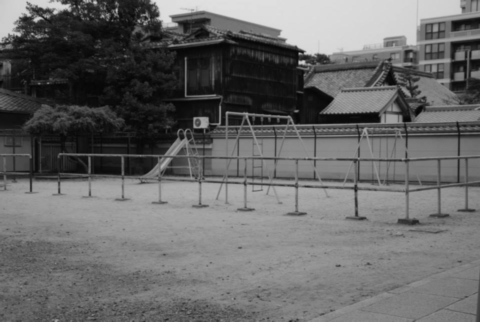

KeyboardInterrupt: 

In [15]:
for id_img in range(1,8):
    image_path = '../data/'+str(id_img)+'.jpg'
    im =  cv2.imread(image_path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    imbase = im
    scale = 1
    base_save_path = "../data/results/"
    img_base_name = str(id_img) + "_"
    keep = dict()
    while len(im) >=36*2 and len(im[0]) >36*2:
        im = cv2.pyrDown(im)
        scale*=2
        img_scale_name = img_base_name + str(scale) + "_"
        print len(im)
        showarray(im)
        for x in range(0,len(im)-36,4):
            for y in range(0,len(im[0])-36,4):
                img_name = img_scale_name + str(x) + "_" + str(y) + ".png"
                imtmp = np.array(im [x:x+36, y:y+36])
                im_input = imtmp[np.newaxis, np.newaxis, :, :]/256.0
                net.blobs['data'].reshape(*im_input.shape)
                net.blobs['data'].data[...] = imtmp
                output = net.forward()
                if output['prob'][0][1] > 0.99:
                    if output['prob'][0][0] < 0.001:
                        save_dir = "1/"
                        for i in range (x*scale, (x+36)*scale):
                            imbase[i][y*scale]=255
                            imbase[i][(y+36)*scale]=255
                        for j in range(y*scale, (y+36)*scale):
                            imbase[x*scale][j]=255
                            imbase[(x+36)*scale][j]=255
                        save_path = base_save_path + save_dir + img_name
                        keep[save_path] = imtmp
    showarray(imbase)
    save_results = "../data/results/"+str(id_img)+".jpg"
    cv2.imwrite(save_results, imbase)
    
    for path,img in keep.iteritems():
        cv2.imwrite(path, img)